# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) PCA Lab I: Voting
Week 7 | Lab 2.3

## Introduction

> **Note:** _This should be a pair exercise._

We've learned what dimensionality reduction is, how it's applied through PCA, and mathematically what PCA does to our data; now, it's time to put your skills to the test! For this lab session, we are going to complete a full principal component analysis using python a dataset.  

Here's the case: 

You're working for a political watchdog that wants to track and analyse the voting behaviour of various (American) politicians. Specifically, we want to understand how the political affiliation of a member of the House of Representatives affects their voting record. You're given a [dataset](./assets/datasets/votes.csv) with a affiliations as well as voting records for a variety of key bills. 

Your task is to perform PCA to determine the principal components of this dataset so that your data science team can perform a clustering analysis to learn how political affiliation is related to voting.


## Exercise

#### Requirements

- Import the data
- Perform a Principal Component Analysis to determine which components are most significant.
    - Conduct a PCA using the long-form method as well as using Scikit-Learn.
- Create a write-up of your findings; for the technical team members make sure to comment your process, and for the non-technical team members, draft a brief report to outline why your findings are significant.

Just as in a real life scenario, the data and your analysis will not always be clear cut. While you may be wondering when you've succeeded in solving the problem,  we're looking for your best recommendations based on the available data. Work through the process until you and your teammate have enough information to provide an in-depth analysis.

**Bonus:**
- Plot the principal components
- Have fun with the eigenfaces example
- Perform a k-means clustering on the voting data (but we will also be doing this on another dataset in Lab 2.4)

**Note:**
The index for the bill column variables of the Congressional voting dataset are as follows: 

  - V1. handicapped-infants: 2 (y,n)
  - V2. water-project-cost-sharing: 2 (y,n)
  - V3. adoption-of-the-budget-resolution: 2 (y,n)
  - V4. physician-fee-freeze: 2 (y,n)
  - V5. el-salvador-aid: 2 (y,n)
  - V6. religious-groups-in-schools: 2 (y,n)
  - V7. anti-satellite-test-ban: 2 (y,n)
  - V8. aid-to-nicaraguan-contras: 2 (y,n)
  - V9. mx-missile: 2 (y,n)
  - V10. immigration: 2 (y,n)
  - V11. synfuels-corporation-cutback: 2 (y,n)
  - V12. education-spending: 2 (y,n)
  - V13. superfund-right-to-sue: 2 (y,n)
  - V14. crime: 2 (y,n)
  - V15. duty-free-exports: 2 (y,n)
  - V16. export-administration-act-south-africa: 2 (y,n)

#### Deliverable

Your finished product will be a Jupyter Notebook containing your analysis, including:

- Your solution code
- A brief write-up on your findings, with one paragraph on your findings and one paragraph on your procedures, related to voting trends
- Recommendations for analytical procedures for the datasets


In [140]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Case: Congressional Voting Data

In [141]:
# votes dataset located at assets/datasets/votes.csv

In [142]:
df = pd.read_csv("assets/datasets/votes.csv")
df.head(2)

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN


In [143]:
df.shape

(435, 18)

Next, let's define the x and y variables: 

In [144]:
df_rep = df[df.Class=="republican"]
df_dem = df[df.Class=="democrat"]
df_rep.fillna(method='pad',axis=0,inplace=True)
df_dem.fillna(method='pad',axis=0,inplace=True)
df_rep.fillna(method='bfill',axis=0,inplace=True)
df_dem.fillna(method='bfill',axis=0,inplace=True)
df = pd.concat([df_rep,df_dem],axis=0)

In [145]:
mapy={'republican':1,'democrat':0}
y = df.Class.map(mapy)

def to_bool(listy):
    res = listy.apply(lambda x: 1 if x=="y" else 0)
    return res

X = df.ix[:,2:].apply(to_bool)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors (i.e. first we use the numpy method)

In [105]:
from __future__ import division
N = X.shape[0]
B=np.column_stack(np.array(X))
S=1/(N-1)*B.dot(B.T)
S

array([[ 0.44700461,  0.23041475,  0.35714286,  0.08064516,  0.12672811,
         0.18894009,  0.34562212,  0.35253456,  0.30875576,  0.20506912,
         0.18202765,  0.08064516,  0.14285714,  0.16820276,  0.24884793,
         0.40552995],
       [ 0.23041475,  0.50230415,  0.28801843,  0.22119816,  0.27419355,
         0.35253456,  0.23963134,  0.26267281,  0.21198157,  0.21658986,
         0.22119816,  0.20737327,  0.30645161,  0.29262673,  0.19124424,
         0.39631336],
       [ 0.35714286,  0.28801843,  0.59447005,  0.07142857,  0.13824885,
         0.2764977 ,  0.47926267,  0.50921659,  0.44700461,  0.30414747,
         0.26267281,  0.0875576 ,  0.17050691,  0.20967742,  0.37557604,
         0.56451613],
       [ 0.08064516,  0.22119816,  0.07142857,  0.41705069,  0.39400922,
         0.37788018,  0.09447005,  0.06451613,  0.05299539,  0.21889401,
         0.07603687,  0.35253456,  0.359447  ,  0.4078341 ,  0.04147465,
         0.26497696],
       [ 0.12672811,  0.27419355,  0

Now, let's check the eigenvalues: 

In [107]:
eigenValues, eigenVectors = np.linalg.eig(S)
eigenValues

array([ 4.7004965 ,  1.8375648 ,  0.34064578,  0.23704447,  0.20034263,
        0.18256976,  0.03279675,  0.13809856,  0.13046122,  0.05154265,
        0.05920083,  0.10895693,  0.10101547,  0.07816397,  0.08227764,
        0.08518149])

And the eigenvectors: 

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [110]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs[:2]:
    print(i[0],i[1])

(4.7004964974884711, array([-0.21192066, -0.23725196, -0.28536679, -0.18270057, -0.2198909 ,
       -0.2966264 , -0.27341716, -0.2718097 , -0.23947144, -0.24335312,
       -0.17033932, -0.18693884, -0.23423912, -0.2719402 , -0.20187901,
       -0.38588503]))
(1.8375648014194776, array([-0.17728524,  0.05943416, -0.27093375,  0.32050222,  0.3454875 ,
        0.27137874, -0.26989443, -0.30498032, -0.28715795,  0.02624646,
       -0.05972074,  0.30406369,  0.29488426,  0.30457052, -0.23939672,
       -0.11766967]))


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [111]:
eigenValues/sum(eigenValues)

array([ 0.56183296,  0.21963732,  0.04071613,  0.02833305,  0.02394621,
        0.02182189,  0.00392007,  0.01650641,  0.01559355,  0.0061607 ,
        0.00707606,  0.01302322,  0.01207401,  0.00934265,  0.00983434,
        0.01018143])

Now, calculate the explained variance and the Cumulative explained variance

In [112]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 56.18329606,  78.14702847,  82.21864144,  85.05194631,
        87.4465677 ,  89.6287565 ,  91.27939754,  92.83875222,
        94.14107413,  95.34847472,  96.36661752,  97.35005167,
        98.28431671,  98.9919223 ,  99.60799255, 100.        ])

In [118]:
projection_4d = np.hstack((eig_pairs[0][1].reshape(eigenVectors.shape[1],1),
                          eig_pairs[1][1].reshape(eigenVectors.shape[1],1),
                          eig_pairs[2][1].reshape(eigenVectors.shape[1],1),
                          eig_pairs[3][1].reshape(eigenVectors.shape[1],1)))
print('Weight data 4D PCA projection matrix:\n', projection_4d)

('Weight data 4D PCA projection matrix:\n', array([[-0.21192066, -0.17728524, -0.16534967,  0.35278936],
       [-0.23725196,  0.05943416, -0.65157271,  0.0602883 ],
       [-0.28536679, -0.27093375, -0.06537943, -0.10337053],
       [-0.18270057,  0.32050222,  0.13799845,  0.2323588 ],
       [-0.2198909 ,  0.3454875 , -0.04010807,  0.08349816],
       [-0.2966264 ,  0.27137874, -0.07097969, -0.21601151],
       [-0.27341716, -0.26989443,  0.18851741,  0.17044014],
       [-0.2718097 , -0.30498032,  0.06483782,  0.02678422],
       [-0.23947144, -0.28715795,  0.15942125,  0.08204653],
       [-0.24335312,  0.02624646,  0.44124609, -0.61027704],
       [-0.17033932, -0.05972074, -0.44584925, -0.53798602],
       [-0.18693884,  0.30406369,  0.15601872,  0.17309716],
       [-0.23423912,  0.29488426, -0.09031982,  0.07806898],
       [-0.2719402 ,  0.30457052,  0.14174973, -0.00115728],
       [-0.20187901, -0.23939672, -0.01830602,  0.0513639 ],
       [-0.38588503, -0.11766967,  0.0811

In [146]:
Z = X.dot(projection_4d)
Z

,0,1,2,3
0,-2.258826,1.808898,0.105165,-0.071553
1,-2.015473,1.782651,-0.336081,0.538724
7,-1.828534,1.478588,-0.492099,0.365627
8,-2.015473,1.782651,-0.336081,0.538724
10,-1.332962,1.628942,-0.346234,0.626154
11,-1.799927,1.840600,-0.863063,-0.127843
14,-1.629588,1.900321,-0.417213,0.410143
15,-1.872941,1.926568,0.024033,-0.200134
18,-1.629588,1.900321,-0.417213,0.410143
28,-2.478214,0.412521,0.633898,1.326507


Now, conduct the PCA using scikit learn

In [165]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
y_pred = km.predict(Z)

In [167]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y, y_pred))
confusion = pd.DataFrame(conmat, index=['is_democrat', 'is_republican'],columns=['predicted_democrat', 'predicted_republican'])
confusion

,predicted_democrat,predicted_republican
is_democrat,225,42
is_republican,7,161


In [168]:
from sklearn.metrics import classification_report
cls_rep = classification_report(y, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.97      0.84      0.90       267
          1       0.79      0.96      0.87       168

avg / total       0.90      0.89      0.89       435



In [169]:
# Use all fearures from dataset
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
y_pred = km.predict(X)
conmat = np.array(confusion_matrix(y, y_pred))
confusion = pd.DataFrame(conmat, index=['is_democrat', 'is_republican'],columns=['predicted_democrat', 'predicted_republican'])
confusion

,predicted_democrat,predicted_republican
is_democrat,225,42
is_republican,7,161


In [171]:
from sklearn.metrics import classification_report
cls_rep = classification_report(y, y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.97      0.84      0.90       267
          1       0.79      0.96      0.87       168

avg / total       0.90      0.89      0.89       435



# BONUS Case: Eigenfaces

We'll explore a well known application of PCA for image analysis, with inspiration from sklearn's documentation example which can be found [here](http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py)

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

Just running the basic code from sklearn takes several cells, so you should go through it and understand
what it is doing. Then you will be asked after that to change some parameters and see how your classification
changes.

1. Change the number of principal components to use, and see how your classification is affected. Judge based on e.g. the f1 score, the accuracy. You can try for example [10, 15, 25, 50, 100, 250] principal components.
- Do you see any evidence of overfitting when using a large number of principal components? Does the dimensionality reduction of PCA seem to be helping your performance here? What if you set the principal components to the number of features? What if you try the classification without PCA?
- Try introspecting the principal components, and the data matrices before and after transformation, to get a better intuition of what a principal component means in this context.

Bear in mind that each pixel is a feature, and faces clearly have patterns, so a priori we expect that PCA can be very effective.

In [185]:
# Remove this if you prefer
from __future__ import print_function

In [186]:
# Download the data, if not already on disk and load it as numpy arrays
# if you get an error try pip install --upgrade pillow
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [187]:
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [199]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.185s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.028s


In [200]:
# Train a SVM classification model

print("Fitting the classifier to the training set... wait")
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set... wait
done in 29.770s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [201]:
# Evaluation of the model quality on the test set

print("Predicting the person names on the testing set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting the person names on the testing set
done in 0.062s
                   precision    recall  f1-score   support

     Ariel Sharon       0.42      0.62      0.50        13
     Colin Powell       0.75      0.85      0.80        60
  Donald Rumsfeld       0.76      0.81      0.79        27
    George W Bush       0.92      0.87      0.89       146
Gerhard Schroeder       0.75      0.84      0.79        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.90      0.75      0.82        36

      avg / total       0.83      0.82      0.82       322

[[  8   0   3   2   0   0   0]
 [  4  51   2   2   0   1   0]
 [  5   0  22   0   0   0   0]
 [  2  10   1 127   3   1   2]
 [  0   2   0   2  21   0   0]
 [  0   2   0   1   3   8   1]
 [  0   3   1   4   1   0  27]]


Most significant principal components:


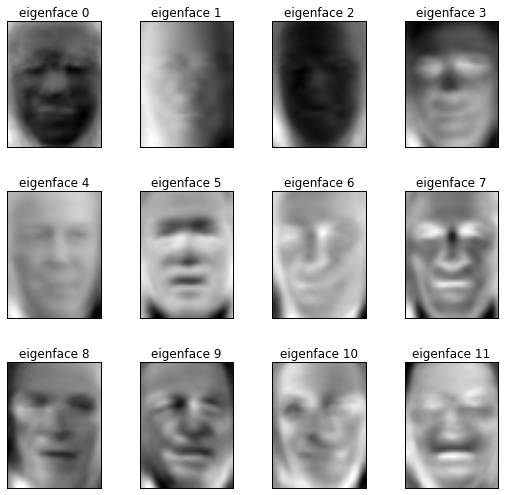

Representative test data:


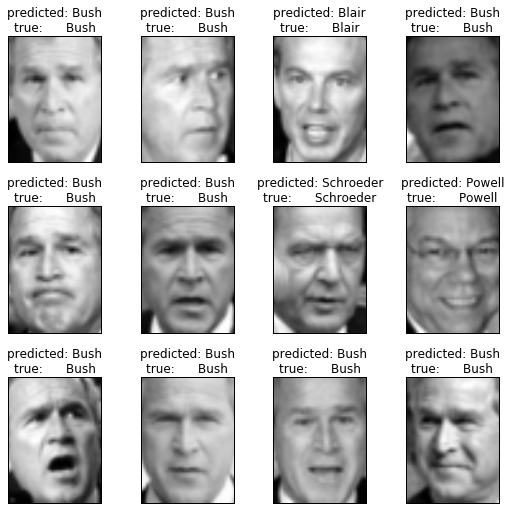

In [202]:
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

# plot the gallery of the most significative eigenfaces
print("Most significant principal components:")
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# plot the result of the prediction on a portion of the test set
print("Representative test data:")
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)